In [1]:
#importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This option ensures that the graphs you create are displayed within the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# defining path
    
path = '/Users/daniel/Library/CloudStorage/OneDrive-Persönlich/00 Synology/01 Dokumente/2023 Docs/99 CareerFoundry/06 Advanced Analytics'

In [5]:
#read csv
citi = pd.read_csv(os.path.join(path, '01 Data', 'citi_clean.csv'))

In [7]:
citi.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender'],
      dtype='object')

In [9]:
citi.head()

,trip_id,bike_id,weekday,start_hour,start_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_time,end_station_id,end_station_name,end_station_latitude,end_station_longitude,trip_duration,subscriber,birth_year,gender
0,LnQzQk,16013,Mon,18,2013-09-09 18:18:55,523,W 38 St & 8 Ave,40.754666,-73.991382,2013-09-09 18:35:28,334,W 20 St & 7 Ave,40.742388,-73.997262,993,Subscriber,1968.0,2
1,IL9boN,15230,Thu,18,2013-09-12 18:38:53,257,Lispenard St & Broadway,40.719392,-74.002472,2013-09-12 18:48:34,236,St Marks Pl & 2 Ave,40.728419,-73.987140,581,Subscriber,1983.0,1
2,46clGB,17942,Wed,19,2013-09-18 19:44:04,479,9 Ave & W 45 St,40.760193,-73.991255,2013-09-18 19:50:05,513,W 56 St & 10 Ave,40.768254,-73.988639,361,Subscriber,1989.0,1
3,v7vdFt,19683,Sat,11,2013-09-28 11:54:37,527,E 33 St & 1 Ave,40.743156,-73.974347,2013-09-28 12:03:58,441,E 52 St & 2 Ave,40.756014,-73.967416,561,Subscriber,1988.0,2
4,HbKJBz,14581,Fri,22,2013-09-27 22:01:01,293,Lafayette St & E 8 St,40.730287,-73.990765,2013-09-27 22:08:08,432,E 7 St & Avenue A,40.726218,-73.983799,427,Subscriber,1986.0,2


In [10]:
citi.shape

(43019, 18)

In [11]:
#missing values?
citi.isnull().sum()

trip_id                    0
bike_id                    0
weekday                    0
start_hour                 0
start_time                 0
start_station_id           0
start_station_name         0
start_station_latitude     0
start_station_longitude    0
end_time                   0
end_station_id             0
end_station_name           0
end_station_latitude       0
end_station_longitude      0
trip_duration              0
subscriber                 0
birth_year                 0
gender                     0
dtype: int64

In [12]:
#duplicates?
dups = citi.duplicated()

In [13]:
dups.shape

(43019,)

/var/folders/nc/z9t985y12f1dkrrfm_wn60n40000gn/T/ipykernel_58028/3669473796.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(citi['start_time'], bins=10)


ValueError: could not convert string to float: '2013-09-09 18:18:55'

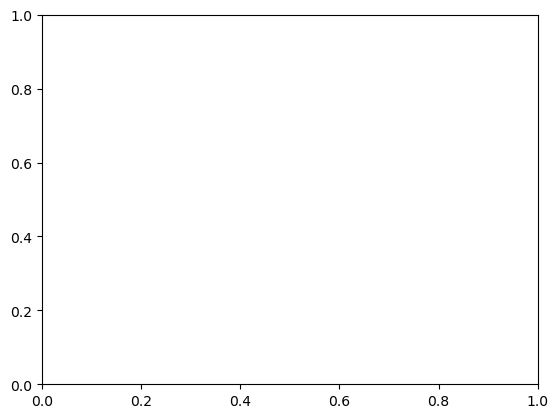

In [21]:
#extreme values check
sns.distplot(citi['start_time'], bins=10)

In [23]:
# Convert the "start_time" column to a datetime type
citi['start_time'] = pd.to_datetime(citi['start_time'])

# Extract the date from the "start_time" column and create a new column "start_date"
citi['start_date'] = citi['start_time'].dt.date

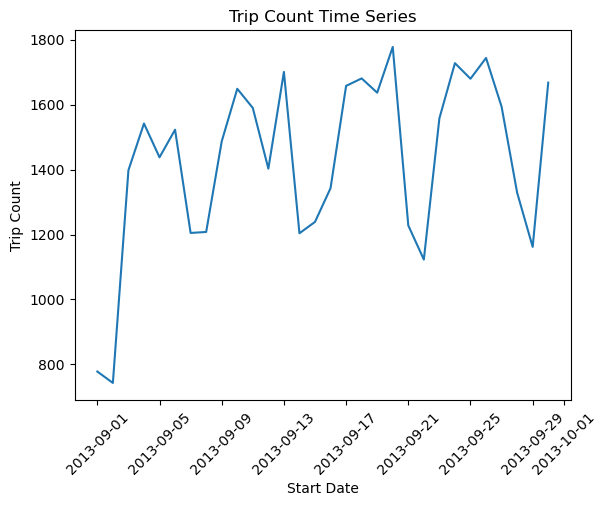

In [25]:
# Group the data by "start_date" and count the occurrences of each date
count_by_date = citi.groupby('start_date')['trip_id'].count()

# Create the time series chart
plt.plot(count_by_date.index, count_by_date.values)

# Set the plot title and axes labels
plt.title('Trip Count Time Series')
plt.xlabel('Start Date')
plt.ylabel('Trip Count')

# Rotate the x-axis tick labels for better readability (optional)
plt.xticks(rotation=45)

# Display the time series chart
plt.show()

In [28]:
citi.shape

(43019, 19)

In [30]:
citi.columns

Index(['trip_id', 'bike_id', 'weekday', 'start_hour', 'start_time',
       'start_station_id', 'start_station_name', 'start_station_latitude',
       'start_station_longitude', 'end_time', 'end_station_id',
       'end_station_name', 'end_station_latitude', 'end_station_longitude',
       'trip_duration', 'subscriber', 'birth_year', 'gender', 'start_date'],
      dtype='object')

In [35]:
from datetime import datetime


# Group the DataFrame by 'start_date' and count the occurrences of 'trip_id'
count_per_date = citi.groupby('start_date')['trip_id'].count()

# Create a new DataFrame with 'start_date' and 'count' columns
count_df = pd.DataFrame({'start_date': count_per_date.index, 'count': count_per_date.values})

# Convert 'start_date' column to numeric values
count_df['start_date_numeric'] = count_df['start_date'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d').timestamp())

# Calculate the correlation between 'count' and 'start_date_numeric'
correlation = count_df['count'].corr(count_df['start_date_numeric'])

# Print the correlation value
print("Correlation:", correlation)

Correlation: 0.402731930516249


Hypothesis: the higher the date, the higher the trip count which would mean a positive slope and increasing trip volume over time.

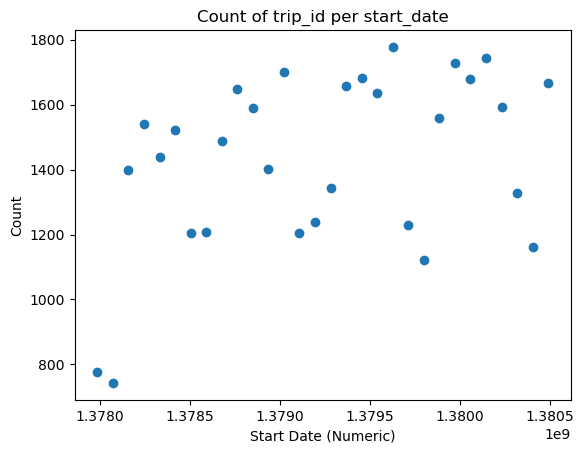

In [36]:
# Create scatter plot
plt.scatter(count_df['start_date_numeric'], count_df['count'])

# Set labels and title
plt.xlabel('Start Date (Numeric)')
plt.ylabel('Count')
plt.title('Count of trip_id per start_date')

# Display the plot
plt.show()


In [38]:
X = count_df['start_date_numeric'].values.reshape(-1,1)
y = count_df['count'].values.reshape(-1,1)

In [39]:
X

array([[1.3779864e+09],
       [1.3780728e+09],
       [1.3781592e+09],
       [1.3782456e+09],
       [1.3783320e+09],
       [1.3784184e+09],
       [1.3785048e+09],
       [1.3785912e+09],
       [1.3786776e+09],
       [1.3787640e+09],
       [1.3788504e+09],
       [1.3789368e+09],
       [1.3790232e+09],
       [1.3791096e+09],
       [1.3791960e+09],
       [1.3792824e+09],
       [1.3793688e+09],
       [1.3794552e+09],
       [1.3795416e+09],
       [1.3796280e+09],
       [1.3797144e+09],
       [1.3798008e+09],
       [1.3798872e+09],
       [1.3799736e+09],
       [1.3800600e+09],
       [1.3801464e+09],
       [1.3802328e+09],
       [1.3803192e+09],
       [1.3804056e+09],
       [1.3804920e+09]])

In [40]:
y

array([[ 778],
       [ 743],
       [1398],
       [1542],
       [1438],
       [1523],
       [1205],
       [1208],
       [1487],
       [1649],
       [1590],
       [1403],
       [1701],
       [1204],
       [1239],
       [1343],
       [1658],
       [1681],
       [1637],
       [1778],
       [1228],
       [1123],
       [1558],
       [1728],
       [1680],
       [1744],
       [1594],
       [1329],
       [1162],
       [1668]])

In [41]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## Regression analysis

In [42]:
# Create a regression object.

regression = LinearRegression()  # This is the regression object, which will be fit onto the training set.

In [43]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

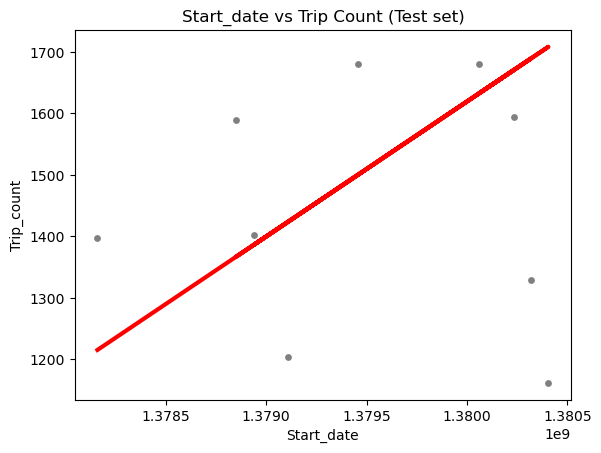

In [48]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Start_date vs Trip Count (Test set)')
plot_test.xlabel('Start_date')
plot_test.ylabel('Trip_count')
plot_test.show()

In [46]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) # This is the mean squared error
r2 = r2_score(y_test, y_predicted) # This is the R2 score. 

In [47]:
# Print the model summary statistics. This is where you evaluate the performance of the model.

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00021941]]
Mean squared error:  66765.05814881595
R2 score:  -0.9408321759528155


In [49]:
y_predicted

array([[1215.38695196],
       [1708.26662953],
       [1423.9129694 ],
       [1367.04223737],
       [1670.35280818],
       [1632.43898683],
       [1689.30971885],
       [1385.99914804],
       [1499.7406121 ]])

In [50]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,1398,1215.386952
1,1162,1708.266630
2,1204,1423.912969
3,1590,1367.042237
4,1594,1670.352808
5,1680,1632.438987
6,1329,1689.309719
7,1403,1385.999148
8,1681,1499.740612


##### Compare how the regression fits the training set

In [52]:
# Predict.

y_predicted_train = regression.predict(X_train) # This is predicting X_train!

In [53]:
rmse = mean_squared_error(y_train, y_predicted_train)
r2 = r2_score(y_train, y_predicted_train)

In [54]:
print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[0.00021941]]
Mean squared error:  60761.291014825925
R2 score:  0.2904202176898619


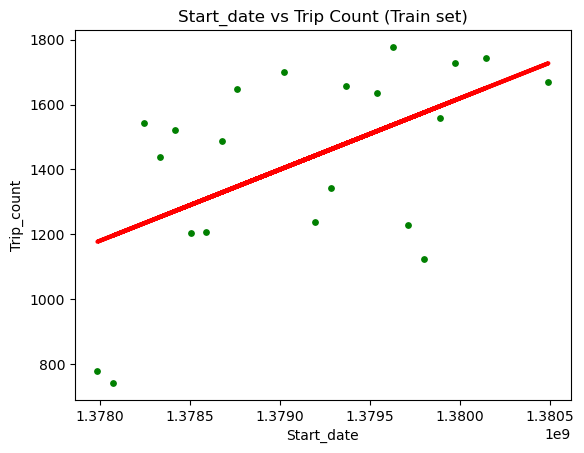

In [55]:
# Visualizing the training set results.

plot_test = plt
plot_test.scatter(X_train, y_train, color='green', s = 15)
plot_test.plot(X_train, y_predicted_train, color='red', linewidth =3)
plot_test.title('Start_date vs Trip Count (Train set)')
plot_test.xlabel('Start_date')
plot_test.ylabel('Trip_count')
plot_test.show()

## Conclusion

1. The slope is positive, so we have a positive relation as indicated in the hypothesis. However, the slope is very small.
2. The mean squared error is very high with 66765. 
3. The negative R2 score of -0,94 suggests that our regression model does not fit the data well.